# Shifted-tilted Tophat at Gaussian interference 0 um shift

Applying first-order shift,tilt to tophat, integrate with HG00



\begin{align*}
\sum_{n,m} u_{n,m} \rightarrow 
	\sum_{n,m} 
	\lbrace &
		u_{n+2,m}[ X_+^2
		(-i\frac{2ka\alpha}{w^2} 
			+ \frac{a\alpha 2k^2}{R_c} 
			)]
		\\+&
		u_{n+1,m}
			[ X_+^1(ik\alpha 
			- \frac{2a}{w^2} 
			- a \frac{ik}{R_c})
			]
		\\+&
		u_{n,m} 
			[1
			+X_+^1
			(ik\alpha \frac{2a\sqrt{n}}{w} e^{i\Psi} )
			+ X_0^2 ( 
			\frac{a\alpha 2k^2}{R_c} 
			- i\frac{2ka\alpha}{w^2}
			)
			]
		\\+&
		u_{n-1,m} 
			[
		\frac{2a\sqrt{n}}{w} e^{i\Psi} 
			+ 	X_-^1(
				ik\alpha 
				- \frac{2a}{w^2}
		 		- a \frac{ik}{R_c}
		 		)
		 	]
		\\+&
		u_{n-2,m} 
		[ X_-^1(
		ik\alpha a\frac{2\sqrt{n}}{w}e^{i\Psi}
		) 
		+ X_-^2 (
			 \frac{a\alpha 2k^2}{R_c} 
			-i\frac{2ka\alpha}{w^2}
		)
		] 	
	\rbrace
\end{align*}


In [1]:
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt
from Signals_Rc_2 import *

from numpy import pi as pi
from numpy import angle
from math import e
from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from math import factorial as fact
import cmath
from cmath import sqrt as sqrt
import numpy as np

from time import process_time

inf=np.inf

import pandas as pd
from pprint import pprint


## Tophat coeffients from AW

In [2]:
# mat = scipy.io.loadmat('Top_hat_for_paul.mat')
mat = scipy.io.loadmat('paul_coef_file.mat')
for x in mat:
  print(x)
coef=mat['coeftopUnitInt'].ravel()
print(mat['readmepaul'])
# coef=mat['coeftop'].ravel()

def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes

area = pi*1e-3**2

#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

__header__
__version__
__globals__
coeftopUnitInt
coeftopUnitPow
readmepaul
['Two tophat coefficient variables, one for unit power and one for \n unit intensity, should be clear from the name which is which.\nAgain these assume a waist 1/3 of a mm.']


In [3]:
params = pl.Params(1064e-9,1e-3,0)
plane = pl.Plane(-2e-3,2e-3,101,-2e-3,2e-3,101)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
modes0 = plb.modes((0,0,1))
f = pl.calculate(params,plane,modes,0)
f0 = pl.calculate(params,plane,modes0,0)





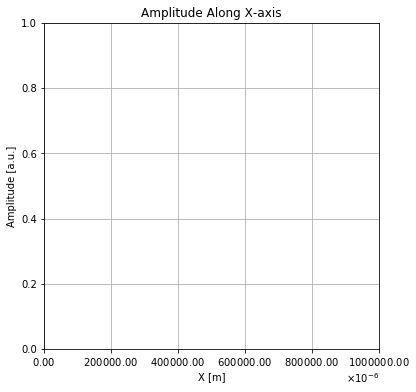

In [4]:
plplt.ampslicex(0,f)

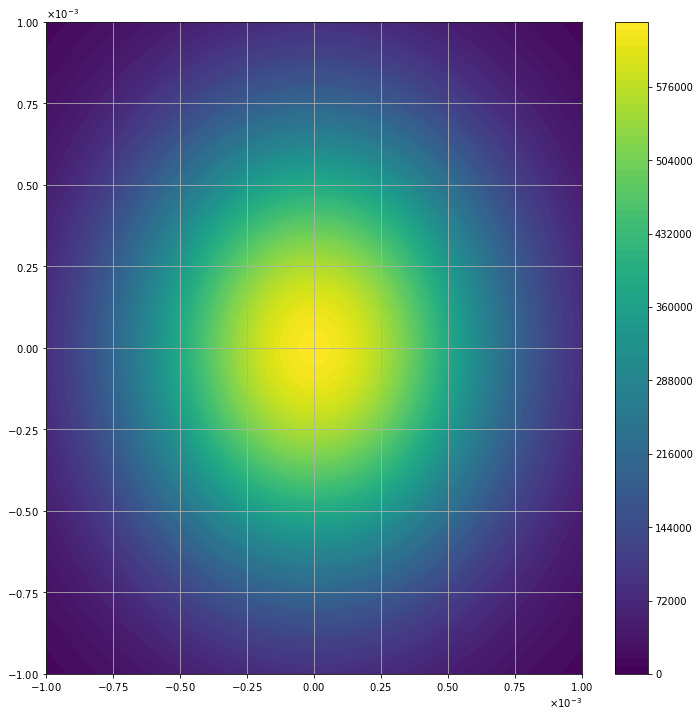

In [39]:
params = pl.Params(1064e-9,1e-3,0)
plane = pl.Plane(-2e-3,2e-3,101,-2e-3,2e-3,101)
# temp_modes=rotate_RX(10e-3,params,10e-3,0,modes)
# pl.show_modes(modes)
calc=pl.calculate(params,plane,modes0,0)
#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2),100)

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

plt.xlim([-1e-3,1e-3])
plt.ylim([-1e-3,1e-3])

cbar = fig.colorbar(cs)

plt.grid()

In [6]:
modes_a_p05 = plb.modes((1,0,.05))
modes_a_p01 = plb.modes((1,0,.1))
modes_a_m01 = plb.modes((1,0,-.1))
modes_a_m05 = plb.modes((1,0,-.05))

modes_b_p05 = plb.modes((0,0,1),(1,0,.05))
modes_b_p01 = plb.modes((0,0,1),(1,0,.1))
modes_b_m01 = plb.modes((0,0,1),(1,0,-.1))
modes_b_m05 = plb.modes((0,0,1),(1,0,-.05))

modes_empty = plb.modes((0,0,1e-10))

In [7]:
f_a_p05 = pl.calculate(params,plane,modes_a_p05,0)
f_a_p01 = pl.calculate(params,plane,modes_a_p01,0)
f_a_m01 = pl.calculate(params,plane,modes_a_m01,0)
f_a_m05 = pl.calculate(params,plane,modes_a_m05,0)

f_b_p05 = pl.calculate(params,plane,modes_b_p05,0)
f_b_p01 = pl.calculate(params,plane,modes_b_p01,0)
f_b_m01 = pl.calculate(params,plane,modes_b_m01,0)
f_b_m05 = pl.calculate(params,plane,modes_b_m05,0)

f_empty = pl.calculate(params,plane,modes_empty,0)

In [9]:
txt = 'a_p'
plplt.ampslicex(0,f_a_p05,name='a_p05')
plplt.ampslicex(0,f_a_p01,name='a_p01')
plplt.ampslicex(0,f_a_m01,name='a_m01')
plplt.ampslicex(0,f_a_m05,name='a_m05')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

amp = amplitude(argv[i].getParams(), argv[i].plane.getX(), y, argv[i].getZ(), argv[i].getModes())
plt.plot(argv[i].plane.getX(), amp, label=i + 1)
saveas= txt+'.png'
plt.savefig(saveas)

ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('Amplitude Along X-axis')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right', title='1')

plt.grid()

TypeError: ampslicex() got multiple values for argument 'name'

In [ ]:
plplt.ampslicex(0,f_b_p05,name='b_p05')
plplt.ampslicex(0,f_b_p01,name='b_p01')
plplt.ampslicex(0,f_b_m01,name='b_m01')
plplt.ampslicex(0,f_b_m05,name='b_m05')
plplt.ampslicex(0,f0,name='b_0')


In [ ]:
plplt.ampslicex(0,f_empty,name='a_0')

In [13]:
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

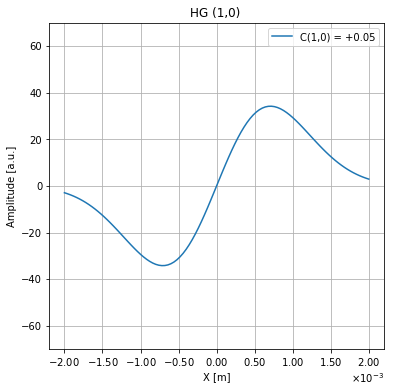

In [69]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_a_p05


amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = +0.05")
saveas= 'f_a_p05'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)


plt.title('HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

ax.set_ylim([-70,70])

plt.grid()
plt.savefig(saveas)

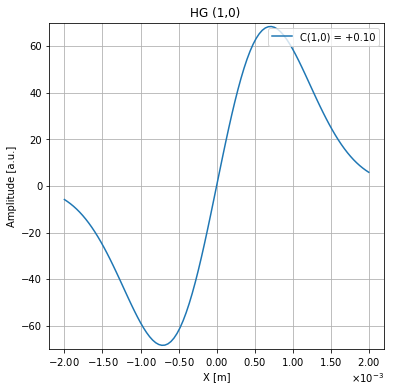

In [70]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_a_p01

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = +0.10")
saveas= 'f_a_p01'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')
ax.set_ylim([-70,70])


plt.grid()
plt.savefig(saveas)

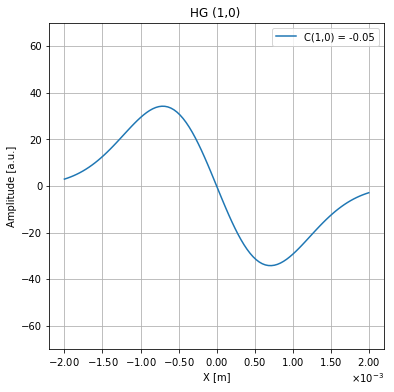

In [74]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_a_m05

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = -0.05")
saveas= 'f_a_m05'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

ax.set_ylim([-70,70])

plt.grid()
plt.savefig(saveas)

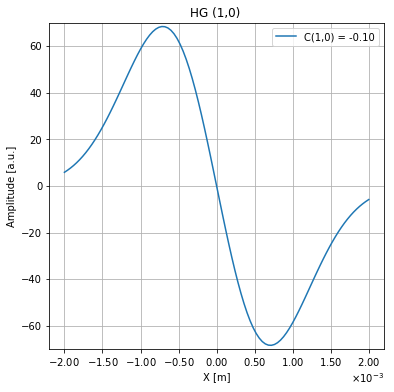

In [75]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_a_m01

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = -0.10")
saveas= 'f_a_m01'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

ax.set_ylim([-70,70])

plt.grid()
plt.savefig(saveas)

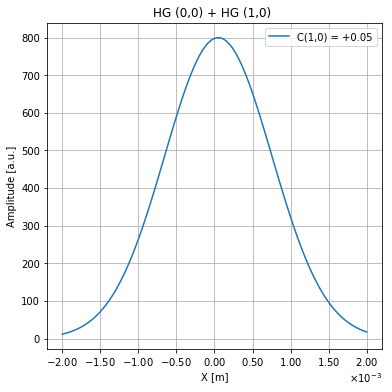

In [76]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_b_p05

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = +0.05")
saveas= 'f_b_p05'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0) + HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

plt.grid()
plt.savefig(saveas)

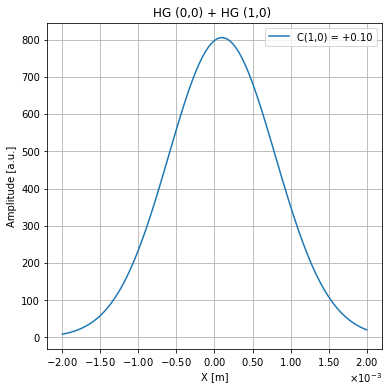

In [77]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_b_p01

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = +0.10")
saveas= 'f_b_p01'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0) + HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

plt.grid()
plt.savefig(saveas)

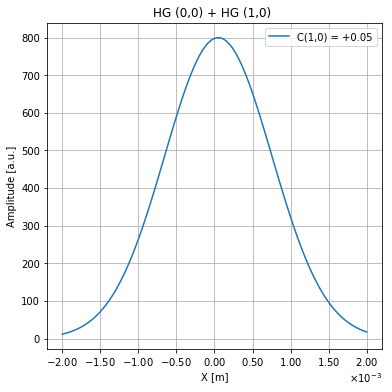

In [78]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_b_p05

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = +0.05")
saveas= 'f_b_p05'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0) + HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

plt.grid()
plt.savefig(saveas)

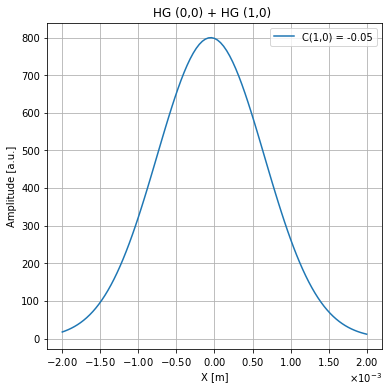

In [79]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_b_m05

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = -0.05")
saveas= 'f_b_m05'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0) + HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

plt.grid()
plt.savefig(saveas)

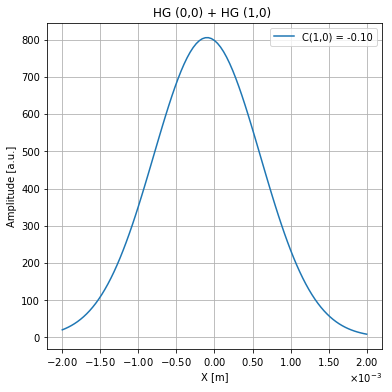

In [80]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f_b_m01

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp, label="C(1,0) = -0.10")
saveas= 'f_b_m01'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0) + HG (1,0) ')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')
plt.legend(loc='upper right')

plt.grid()
plt.savefig(saveas)

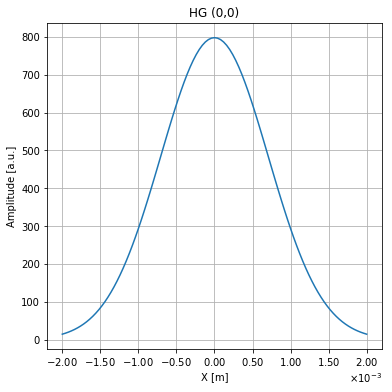

In [82]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ar = f0

amp = amplitude(ar.getParams(), ar.plane.getX(), 0, ar.getZ(), ar.getModes())
plt.plot(ar.plane.getX(), amp)
saveas= 'f_b'+'.png'


ax.xaxis.set_major_formatter(OOMFormatter(0, "%1.3f"))
ax.xaxis.set_major_formatter(OOMFormatter(-3, "%1.2f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.title('HG (0,0)')
plt.xlabel('X [m]')
plt.ylabel('Amplitude [a.u.]')

plt.grid()
plt.savefig(saveas)